<a href="https://colab.research.google.com/github/najwafach/GSBT2025/blob/main/Pertemuan%204/Tugas%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

Bagging (Bootstrap Aggregating) adalah metode ensemble learning yang bekerja dengan cara membuat banyak model independen dari hasil pengambilan sampel data secara acak dengan pengembalian (bootstrap sampling). Setiap model dilatih secara terpisah, kemudian hasil prediksinya digabungkan menggunakan metode agregasi seperti majority voting untuk klasifikasi atau average untuk regresi. Tujuan utama bagging adalah mengurangi variance dan mencegah overfitting pada model tunggal yang terlalu sensitif terhadap data latih. Contoh algoritma yang menggunakan konsep ini adalah Bagging Classifier dan Random Forest.

Sementara itu, Boosting bekerja secara berurutan, di mana setiap model baru dibangun untuk memperbaiki kesalahan dari model sebelumnya. Data yang salah diklasifikasikan pada model sebelumnya akan diberikan bobot lebih tinggi, sehingga model berikutnya lebih fokus pada data tersebut. Dengan cara ini, boosting berupaya mengurangi bias sekaligus variance sehingga menghasilkan model yang lebih akurat. Contoh algoritma yang menggunakan pendekatan ini antara lain AdaBoost dan Gradient Boosting.

# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (RandomForest - Sklearn):", accuracy_score(y_test, preds))

Accuracy (RandomForest - Sklearn): 0.956140350877193


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [4]:
from collections import Counter

class RandomForest:
    def __init__(self, n_trees=10, max_depth=None, min_samples_split=2, n_features=None, random_state=42):
        np.random.seed(random_state)
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.trees = []

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            X_samp, y_samp = self._bootstrap_samples(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def _most_common_label(self, y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [self._most_common_label(pred) for pred in tree_preds]
        return np.array(y_pred)

## Predict Using Random Forest

In [10]:
rf_scratch = RandomForest(n_trees=10, max_depth=5)
rf_scratch.fit(X_train, y_train)
predictions = rf_scratch.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (RandomForest - From Scratch):", accuracy_score(y_test, predictions))

Accuracy (RandomForest - From Scratch): 0.956140350877193


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [ ]:
# define and train the model using GradientBoostingClassifier from Sklearn
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

preds = gb_clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (GradientBoosting - Sklearn):", accuracy_score(y_test, preds))

## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [7]:
class GradientBoostingClassifierScratch:
    def __init__(self, n_estimators=25, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.F0 = None

    def fit(self, X, y):
        # Inisialisasi prediksi awal (log odds)
        p = np.mean(y)
        self.F0 = np.log(p / (1 - p))
        Fm = np.full(len(y), self.F0)

        for m in range(self.n_estimators):
            # Hitung residual (negative gradient)
            p = 1 / (1 + np.exp(-Fm))
            residual = y - p

            # Fit weak learner (Decision Tree Regressor)
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.models.append(tree)

            # Update prediksi
            Fm += self.learning_rate * tree.predict(X)

    def predict(self, X):
        Fm = np.full(X.shape[0], self.F0)
        for tree in self.models:
            Fm += self.learning_rate * tree.predict(X)
        probs = 1 / (1 + np.exp(-Fm))
        return (probs >= 0.5).astype(int)

## Predict Using Gradient Boosting

In [11]:
# define and train the model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
# get predictions:
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, preds))

Accuracy (Gradient Boosting): 0.956140350877193


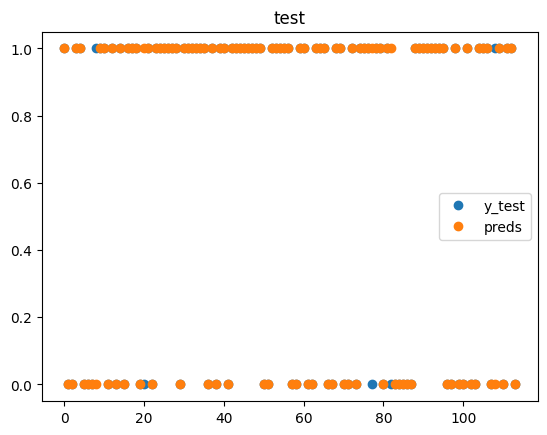

In [14]:
# plot predictions vs. the ground truth:
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()